In [2]:
import findspark
findspark.init()
import pyspark
import json
import pyspark
import socket
import threading
import time
from pyspark.streaming import StreamingContext
from sseclient import SSEClient
from pyspark.sql import SparkSession
import logging

logging.debug("-> start")

spark = SparkSession.builder \
    .appName("Read lines over a network stream") \
    .master("local[*]").getOrCreate()

df = spark.readStream.format("socket") \
    .option("host", "localhost") \
    .option("port", 911) \
    .load()

query = df.writeStream.outputMode("append") \
    .format("console") \
    .start()

query.awaitTermination(timeout=20)
# # time.sleep(120)
# query.stop()

False

## Task 1 

### Streaming from TCP Socket


In [2]:
import findspark
findspark.init()
import pyspark
import json
import pyspark
import socket
import threading
import time
from pyspark.streaming import StreamingContext
from sseclient import SSEClient
from pyspark.sql import SparkSession
import logging

In [ ]:
logging.debug("-> start")

spark = SparkSession.builder \
    .appName("Read lines over a network stream") \
    .master("local[*]").getOrCreate()

In [3]:
# !ncat -lk -p 911

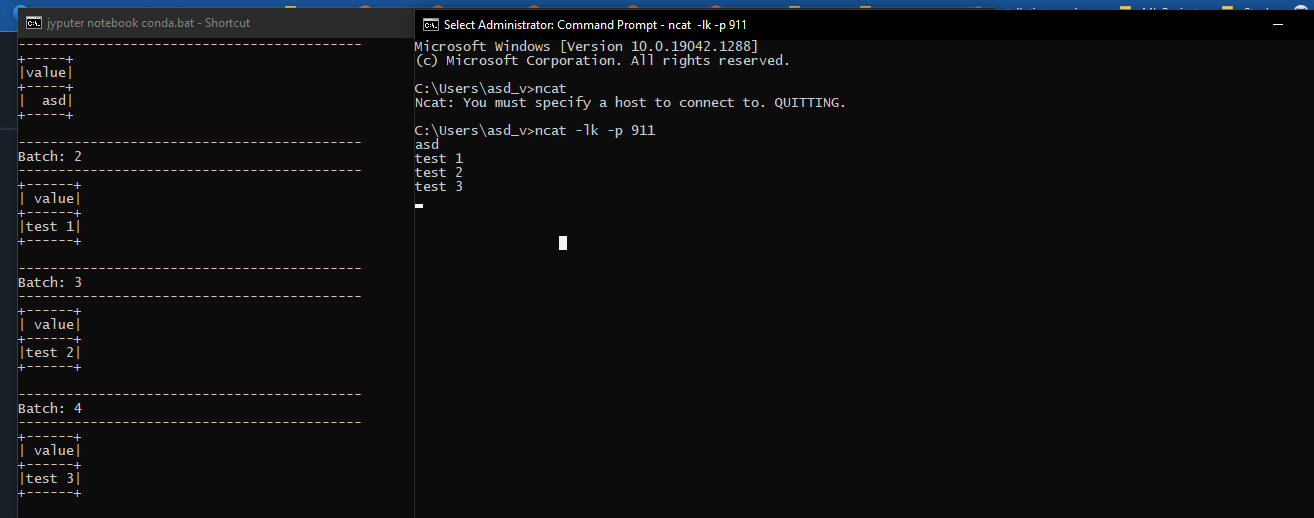

### Print Schema

### After processing, you can write the DataFrame to console.

## Task 2

let’s create a streaming DataFrame that represents text data received from a server listening on localhost:9999, and transform the DataFrame to calculate word counts.

### Create DataFrame representing the stream of input lines from connection to localhost:9999


In [4]:
lines = spark.readStream.format('socket').option('host','localhost')\
.option('port','911').load()

### Split the lines into words


In [5]:
import pyspark.sql.functions as F

In [6]:
words = lines.select(F.explode(F.split(F.col('value'),' ')).alias('word'))

### Generate running word count


In [7]:
wordCounts = words.groupBy("word").count()

### Start running the query that prints the running counts to the console


In [ ]:
import pyspark.sql.functions as F
lines = spark.readStream.format('socket').option('host','localhost')\
.option('port','911').load()
words = lines.select(F.explode(F.split(F.col('value'),' ')).alias('word'))
wordCounts = words.groupBy("word").count()
query = wordCounts.writeStream.outputMode("complete") \
    .format("console") \
    .start()

query.awaitTermination()

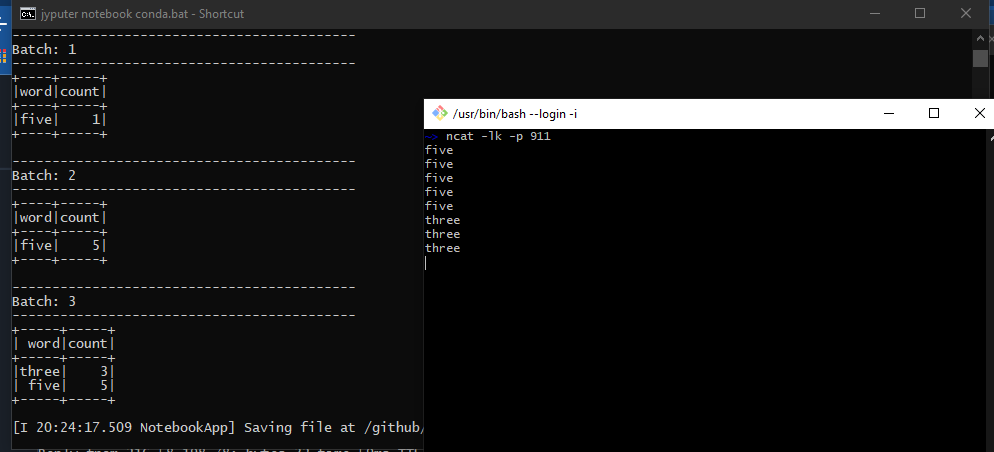

### Read csv file "test1.csv"

In [8]:
test3 = spark.read.csv('test3.csv',header=True,inferSchema=True)

In [9]:
test3.printSchema()

root
 |-- Name: string (nullable = true)
 |-- Departments: string (nullable = true)
 |-- salary: integer (nullable = true)



In [10]:
recordSchema='Name String, age Integer, Experience Integer, Salary Integer'

In [11]:
df = spark.readStream.format("csv") \
    .schema(recordSchema).option('header','true')\
    .load('csvFiles')

### Writing Spark Streaming to Console


In [12]:
query = df.writeStream.outputMode("append") \
    .format("console") \
    .option("truncate", False) \
    .option("numRows", 10) \
    .start()


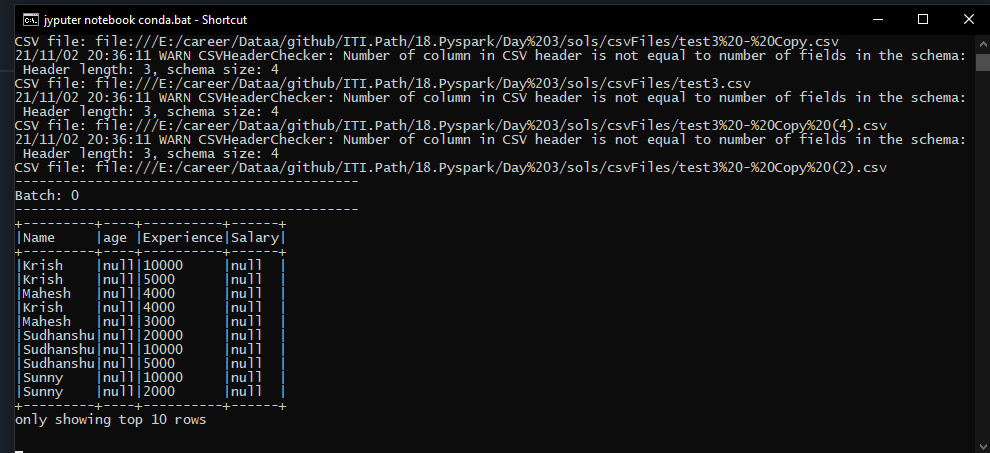

## Task 3 

#### Creat GraphFrames
Users can create GraphFrames from vertex and edge DataFrames.

Vertex DataFrame: A vertex DataFrame should contain a special column named "id" which specifies unique IDs for each vertex in the graph.
Edge DataFrame: An edge DataFrame should contain two special columns: "src" (source vertex ID of edge) and "dst" (destination vertex ID of edge).
Both DataFrames can have arbitrary other columns. Those columns can represent vertex and edge attributes.

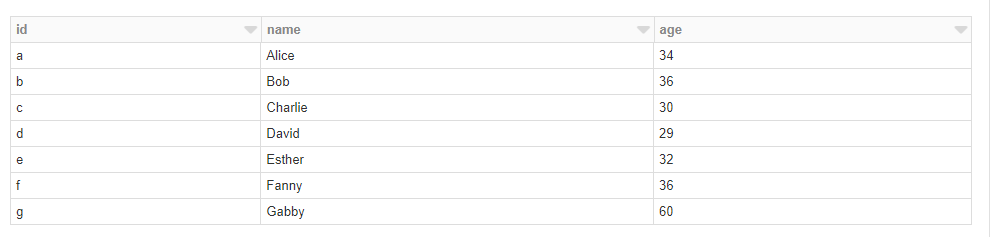

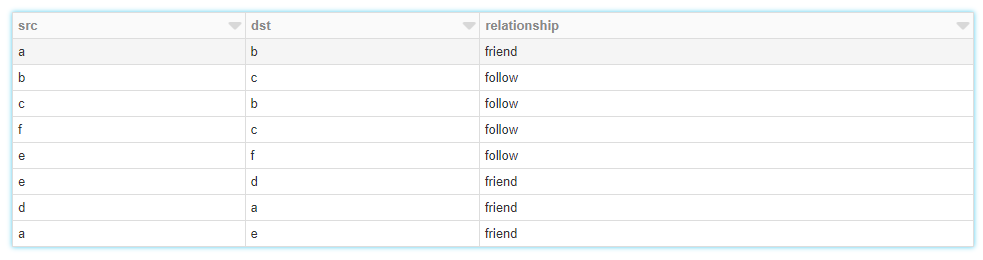

In [2]:
from pyspark import SparkContext
sc = SparkContext.getOrCreate()
# sc.addPyFile('/opt/spark/jars/graphframes-0.8.2-spark3.0-s_2.12.jar')

from graphframes import *

Py4JError: org.apache.spark.api.python.PythonUtils.getPythonAuthSocketTimeout does not exist in the JVM

### Create a graph from these vertices and these edges:

In [14]:

v = spark.createDataFrame([
  ("a", "Alice", 34),
  ("b", "Bob", 36),
  ("c", "Charlie", 30),
  ("d", "David", 29),
  ("e", "Esther", 32),
  ("f", "Fanny", 36),
  ("g", "Gabby", 60)
], ["id", "name", "age"])

e = spark.createDataFrame([
  ("a", "b", "friend"),
  ("b", "c", "follow"),
  ("c", "b", "follow"),
  ("f", "c", "follow"),
  ("e", "f", "follow"),
  ("e", "d", "friend"),
  ("d", "a", "friend"),
  ("a", "e", "friend")
], ["src", "dst", "relationship"])

g = GraphFrame(v, e)

### Display vertices

In [15]:
g.vertices.show()

+---+-------+---+
| id|   name|age|
+---+-------+---+
|  a|  Alice| 34|
|  b|    Bob| 36|
|  c|Charlie| 30|
|  d|  David| 29|
|  e| Esther| 32|
|  f|  Fanny| 36|
|  g|  Gabby| 60|
+---+-------+---+



### Display edges

In [16]:
g.edges.show()

+---+---+------------+
|src|dst|relationship|
+---+---+------------+
|  a|  b|      friend|
|  b|  c|      follow|
|  c|  b|      follow|
|  f|  c|      follow|
|  e|  f|      follow|
|  e|  d|      friend|
|  d|  a|      friend|
|  a|  e|      friend|
+---+---+------------+



### Display inDegrees


In [17]:
g.inDegrees.show()

+---+--------+
| id|inDegree|
+---+--------+
|  f|       1|
|  e|       1|
|  d|       1|
|  c|       2|
|  b|       2|
|  a|       1|
+---+--------+



### Display the outgoing degree of the vertices:



In [18]:
g.outDegrees.show()

+---+---------+
| id|outDegree|
+---+---------+
|  f|        1|
|  e|        2|
|  d|        1|
|  c|        1|
|  b|        1|
|  a|        2|
+---+---------+



### Display the degree of the vertices:



In [19]:
g.degrees.show()

+---+------+
| id|degree|
+---+------+
|  f|     2|
|  e|     3|
|  d|     2|
|  c|     3|
|  b|     3|
|  a|     3|
+---+------+



### Find the age of the youngest person in the graph

In [20]:
import pyspark.sql.functions as F

In [21]:
g.vertices.select(F.min('age')).show()

+--------+
|min(age)|
+--------+
|      29|
+--------+



### Count the number of 'follow' relationships in the graph:

In [22]:
g.edges.filter('relationship = "follow"').count()

4

### Motif finding


Search for pairs of vertices with edges in both directions between them.

In [23]:
g.find('(a)-[e]->(b); (b)-[e2]->(a)').show()

+----------------+--------------+----------------+--------------+
|               a|             e|               b|            e2|
+----------------+--------------+----------------+--------------+
|[c, Charlie, 30]|[c, b, follow]|    [b, Bob, 36]|[b, c, follow]|
|    [b, Bob, 36]|[b, c, follow]|[c, Charlie, 30]|[c, b, follow]|
+----------------+--------------+----------------+--------------+



find all the reciprocal relationships in which one person is older than 30:

In [24]:
motif_age = g.find('(a)-[e]->(b)')

In [25]:
motif_age.show()

+----------------+--------------+----------------+
|               a|             e|               b|
+----------------+--------------+----------------+
| [e, Esther, 32]|[e, f, follow]|  [f, Fanny, 36]|
|  [a, Alice, 34]|[a, e, friend]| [e, Esther, 32]|
| [e, Esther, 32]|[e, d, friend]|  [d, David, 29]|
|  [f, Fanny, 36]|[f, c, follow]|[c, Charlie, 30]|
|    [b, Bob, 36]|[b, c, follow]|[c, Charlie, 30]|
|[c, Charlie, 30]|[c, b, follow]|    [b, Bob, 36]|
|  [a, Alice, 34]|[a, b, friend]|    [b, Bob, 36]|
|  [d, David, 29]|[d, a, friend]|  [a, Alice, 34]|
+----------------+--------------+----------------+



In [26]:
motif_age.filter('(a.Age > 30 AND b.Age < 30) OR (a.Age < 30 AND b.Age > 30)').show()

+---------------+--------------+--------------+
|              a|             e|             b|
+---------------+--------------+--------------+
|[e, Esther, 32]|[e, d, friend]|[d, David, 29]|
| [d, David, 29]|[d, a, friend]|[a, Alice, 34]|
+---------------+--------------+--------------+

